Landsat Dataset Analysis:

- [link](https://portal.edirepository.org/nis/mapbrowse?packageid=edi.1427.1)





In [ ]:
import dask.dataframe as dd
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
data_dir = "C:/Users/sotarolabustos/Documents/Hazen/Projects/quarry_lakes/New_Dataset/edi.1427.1/"
# Filenames
str_aux = 'LAGOS_US_LANDSAT_'
data_predictions_fname = str_aux + 'Predictions_v1_QAQC.csv'
data_description_fname = str_aux + 'data_description.csv'
data_matchups_fname = str_aux + 'matchups.csv'
# Filename selected quarry lakes
#data_quarry = os.path.join(data_dir, 'Reference_Lakes_QC.csv')
data_quarry = os.path.join(data_dir, 'QL_reference_lakes.csv')

- Check variables and units:

In [ ]:
test_df = pd.read_csv(os.path.join(data_dir,data_description_fname), dtype={'column_index': 'int64'})
test_df.head()
#selected_columns = [3,4,5,6,7,8]
#test_df.iloc[:,selected_columns]

,table_name,variable_name,variable_description,data_type,column_index
0,LAGOS_US_LANDSAT_compiledRS,system.index,Landsat index,character,1.0
1,LAGOS_US_LANDSAT_compiledRS,BluedivGreenmedian,pixel-wise median blue reflectance divided by ...,numeric,2.0
2,LAGOS_US_LANDSAT_compiledRS,BluedivNIRmedian,pixel-wise median blue reflectance divided by ...,numeric,3.0
3,LAGOS_US_LANDSAT_compiledRS,BluedivRedmedian,pixel-wise median blue reflectance divided by ...,numeric,4.0
4,LAGOS_US_LANDSAT_compiledRS,BluedivSWIR1median,pixel-wise median blue reflectance divided by ...,numeric,5.0


In [69]:
import dask.dataframe as dd
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

data_dir = "C:/Users/sotarolabustos/Documents/Hazen/Projects/quarry_lakes/New_Dataset/edi.1427.1/"
str_aux = 'LAGOS_US_LANDSAT_'
data_predictions_fname = str_aux + 'Predictions_v1_QAQC.csv'
data_description_fname = str_aux + 'data_description.csv'
data_matchups_fname = str_aux + 'matchups.csv'
data_quarry = os.path.join(data_dir, 'Reference_Lakes_QC.csv')

# Load data quarry with specified dtype for lagoslakeid
df_quarry = pd.read_csv(data_quarry, encoding='latin1', dtype={'lagoslakeid': 'int64'})  # Specify the encoding if needed
# Rename the column 'Ftr_Type_Hazen_QC' to 'Ftr_Type'
df_quarry = df_quarry.rename(columns={'Ftr_Type_Hazen_QC': 'laketype'})
selected_IDS = df_quarry[df_quarry['IN_LIMNO'] == 'yes']['lagoslakeid']

# Load df_data with Dask, specifying the dtype for lagoslakeid
df_data = dd.read_csv(os.path.join(data_dir, data_predictions_fname), dtype={'lagoslakeid': 'int64'})

# Filter data where QAQC_recommend is True
df_data = df_data[df_data['QAQC_recommend'] == True]
# Filter df_data to only include rows where lagoslakeid is in selected_IDS
df_data = df_data[df_data['lagoslakeid'].isin(selected_IDS)]

# Convert sensing time to datetime
df_data['SENSING_TIME'] = dd.to_datetime(df_data['SENSING_TIME'])
# Compute the filtered DataFrame
df_data = df_data.compute()
# Merge df_quarry with df_data on lagoslakeid to include Ftr_Type_Hazen_QC
df_data = df_data.merge(df_quarry[['lagoslakeid', 'laketype']], on='lagoslakeid', how='left')

# Display the first few rows of the filtered DataFrame
print("First few rows of the filtered DataFrame:")
print(df_data.head())

# Display the shape of the filtered DataFrame
print("Shape of the filtered DataFrame:")
print(df_data.shape)

C:\Users\sotarolabustos\AppData\Local\Temp\ipykernel_21884\2194593199.py:15: DtypeWarning:

Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.



First few rows of the filtered DataFrame:
         SENSING_TIME  lagoslakeid  CHL_predicted  NTU_predicted  \
0 2013-08-15 17:00:00          100       2.807634       0.963601   
1 2013-08-31 17:00:00          100       4.895704       1.640338   
2 2013-09-16 17:00:00          100       5.372379       1.404496   
3 2013-10-02 17:00:00          100       4.905962       1.459691   
4 2013-10-18 17:00:00          100       6.860724       1.177845   

   DOC_predicted  TSS_predicted  COLORT_predicted  Secchi_predicted  \
0       3.068492       8.920338         15.202987          5.122992   
1       5.594772       4.579080         37.208688          2.605190   
2       5.624606       4.210819         40.791857          2.846124   
3       5.354506       4.445139         42.513444          2.434320   
4       3.980639      17.088265         35.204730          2.226410   

   Negative_reflectance_min  Negative_reflectance_median  Pixel_perc_of_max  \
0                     False                

In [50]:
df_data.head()
df_data['laketype'].value_counts()

laketype
Natural                3043750
Gravel Pit               89063
Sand Pit                 15588
Borrow Pit                6329
Quarry                    3511
Sand and Gravel Pit       1448
Name: count, dtype: int64

In [58]:
# Variables to visualize
#vars = ['CHL_predicted', 'NTU_predicted', 'DOC_predicted', 'TSS_predicted', 'COLORT_predicted', 'Secchi_predicted']

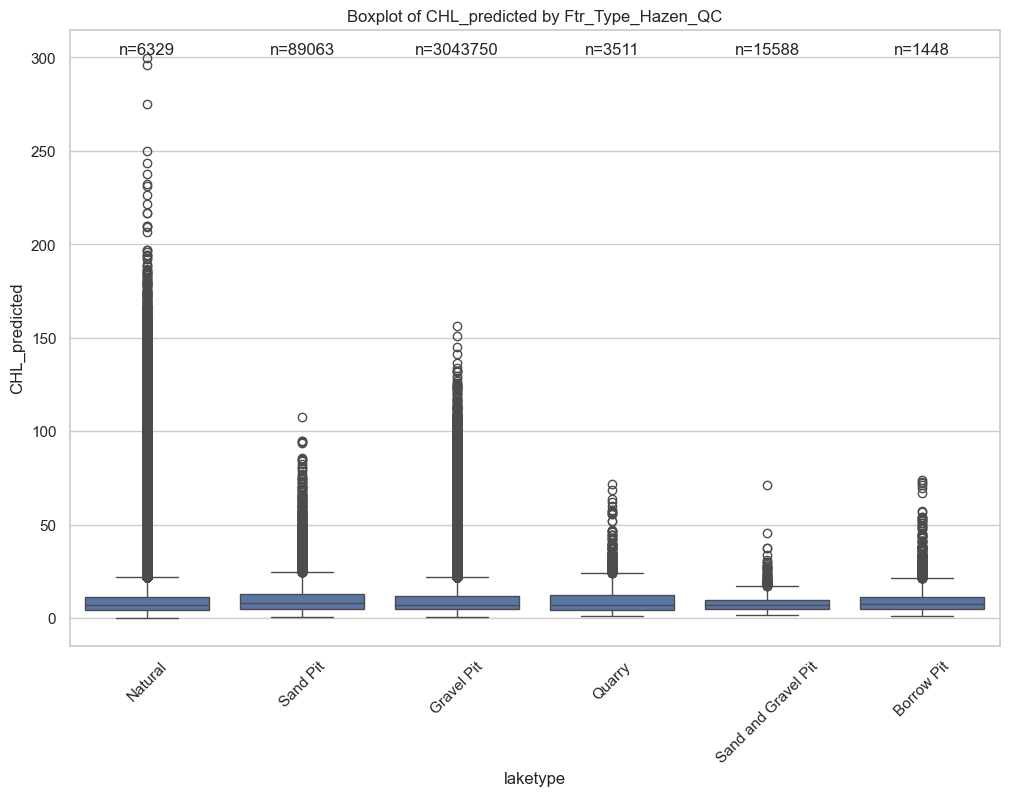

In [ ]:
# Variables in dataset
vars = ['CHL_predicted', 'NTU_predicted', 'DOC_predicted', 'TSS_predicted', 'COLORT_predicted', 'Secchi_predicted']
# Visualize data 
import seaborn as sns
import matplotlib.pyplot as plt
# Set the them to look more like ggplot2
sns.set_theme(style="whitegrid")
# Create a boxplot for CHL_predicted with Ftr_Type_Hazen_QC as categories
plt.figure(figsize=(12, 8))
ax = sns.boxplot(x='laketype', y='CHL_predicted', data=df_data)
plt.title('Boxplot of CHL_predicted by Ftr_Type_Hazen_QC')
plt.xlabel('laketype')
plt.ylabel('CHL_predicted')
plt.xticks(rotation=45)  # Rotate x-axis labels if needed

# Add the number of points on each plot
grouped = df_data.groupby('laketype').size()
for i, count in enumerate(grouped):
    ax.text(i, df_data['CHL_predicted'].max(), f'n={count}', ha='center', va='bottom')
plt.show()


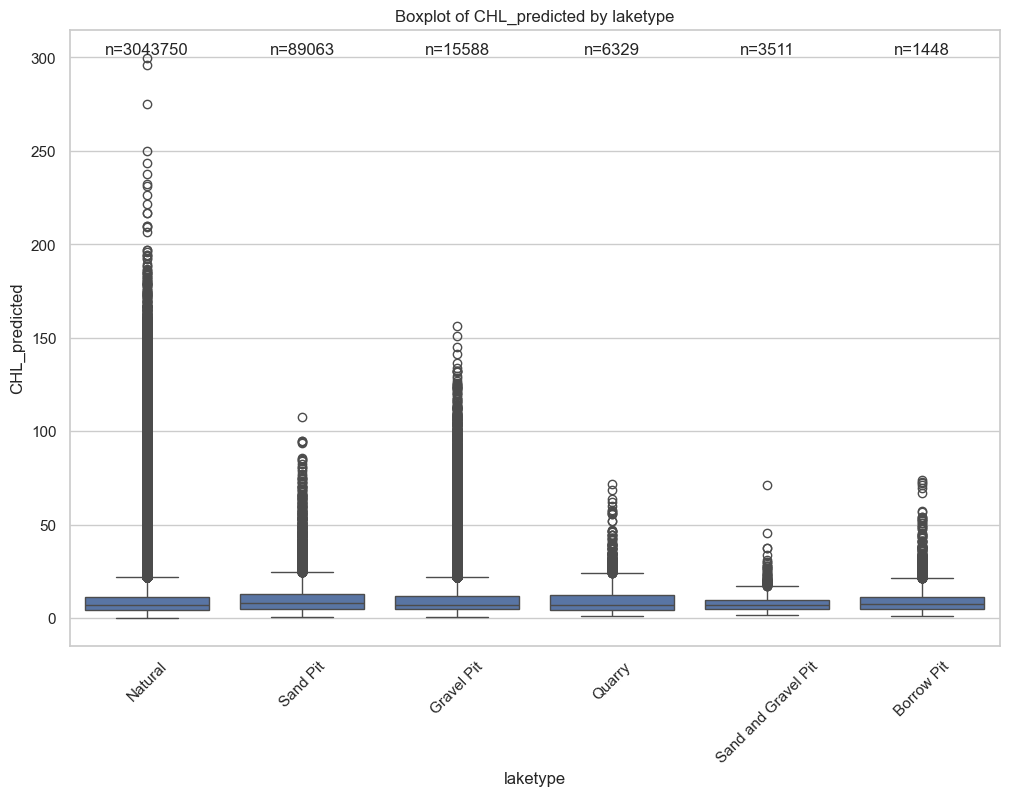

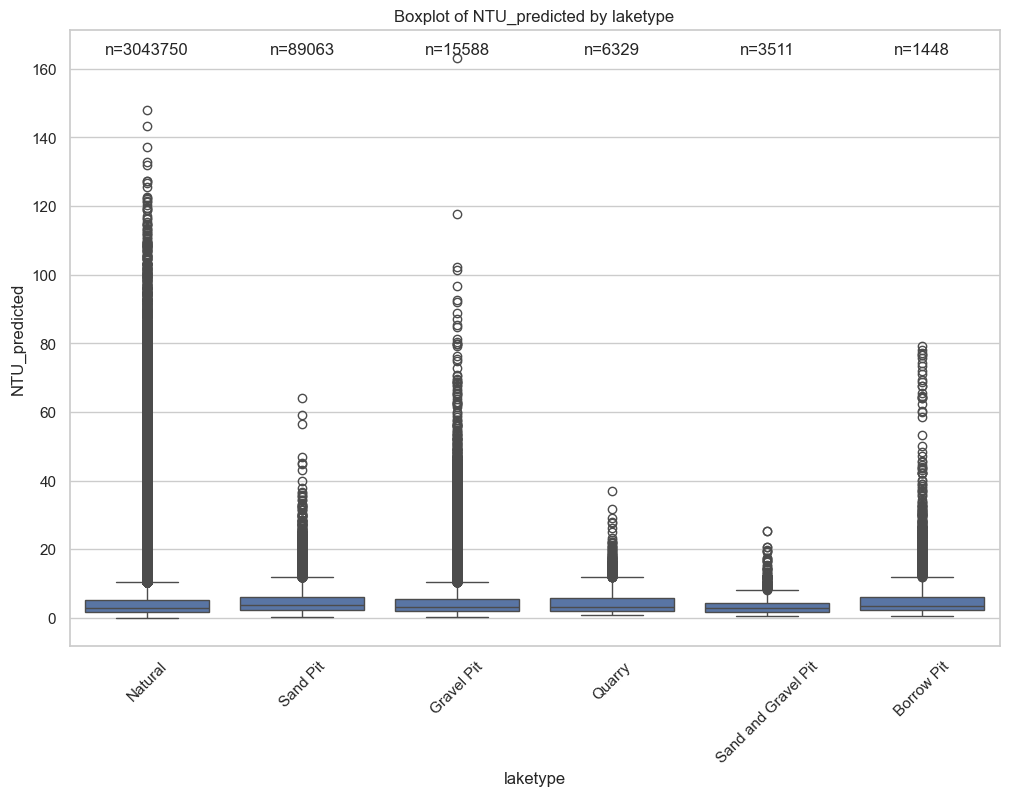

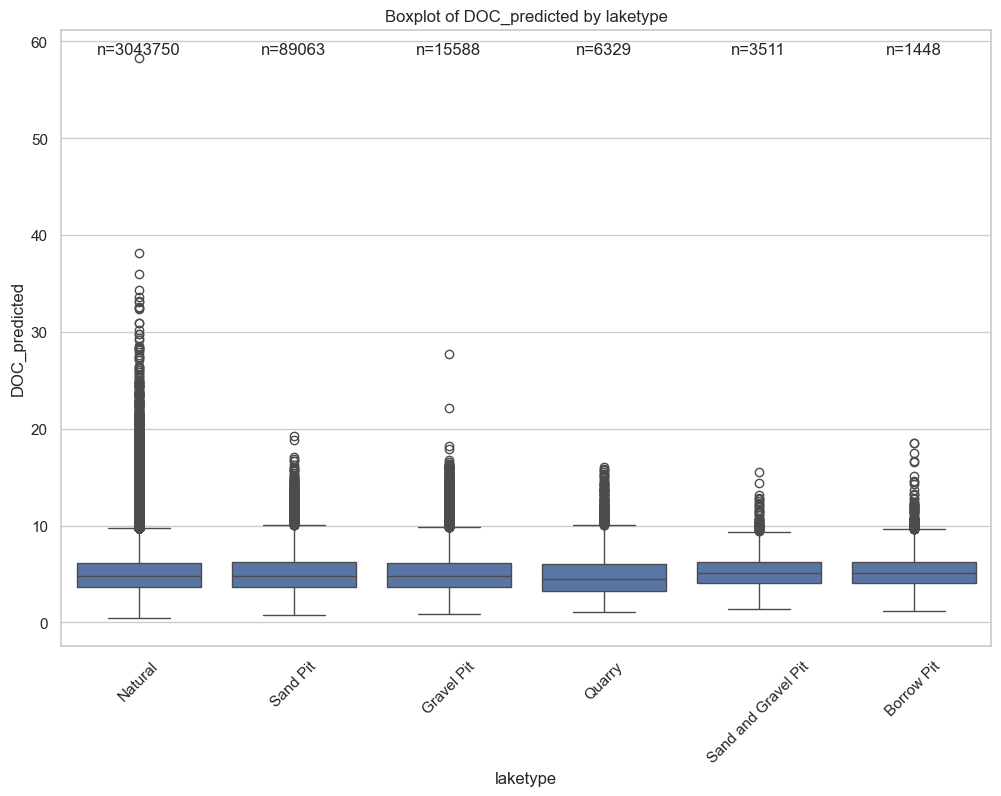

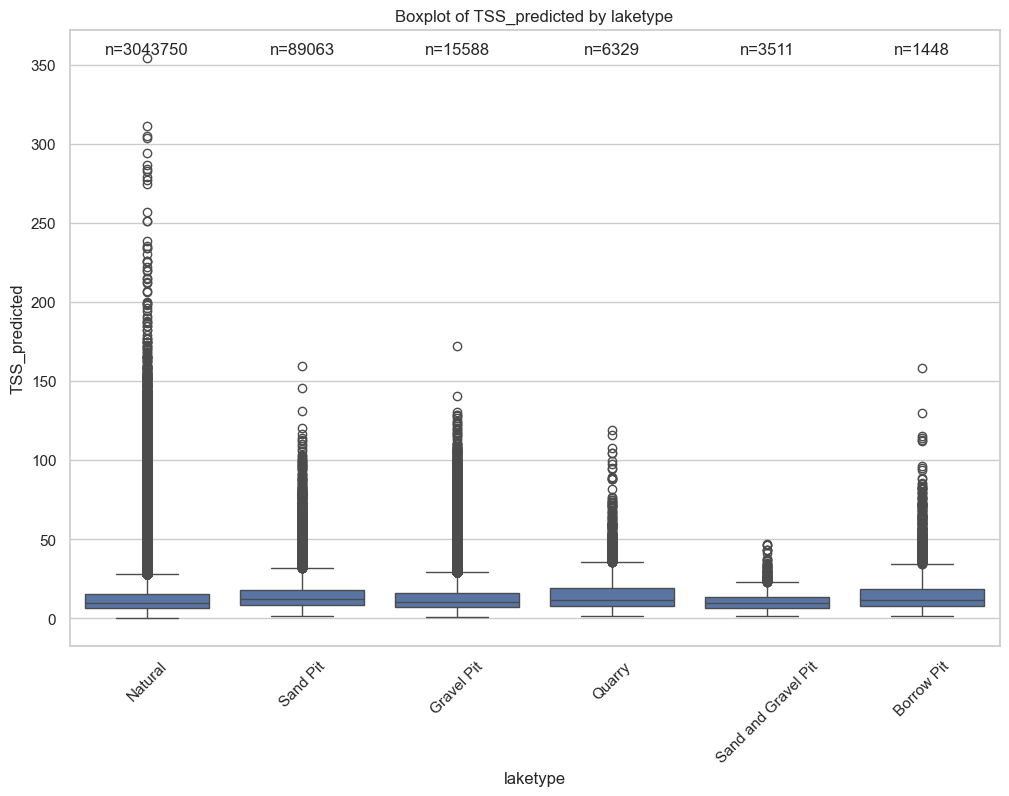

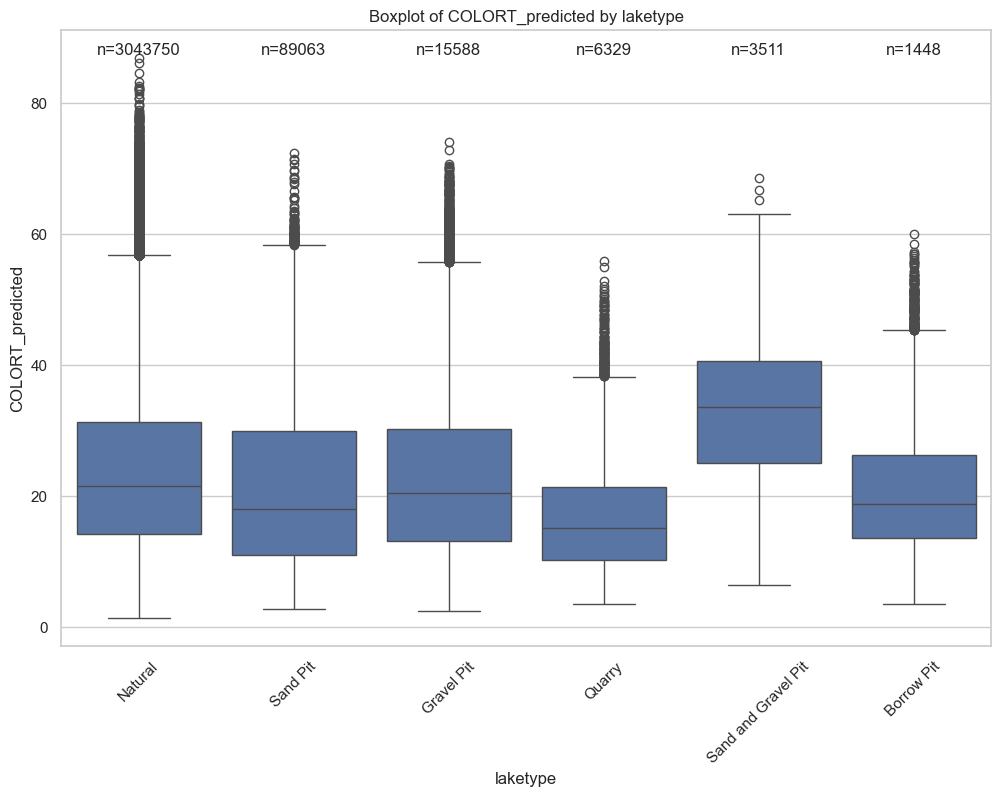

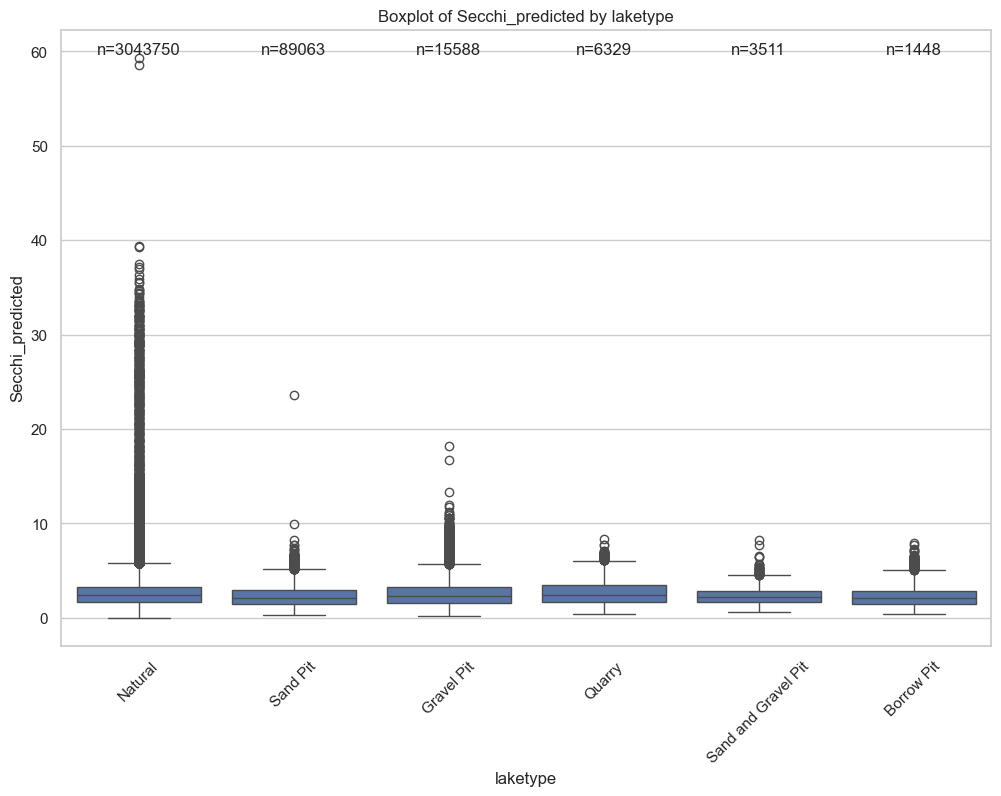

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the function to create a boxplot
def create_boxplot(df, variable):
    plt.figure(figsize=(12, 8))
    ax = sns.boxplot(x='laketype', y=variable, data=df)
    plt.title(f'Boxplot of {variable} by laketype')
    plt.xlabel('laketype')
    plt.ylabel(variable)
    plt.xticks(rotation=45)  # Rotate x-axis labels if needed

    # Add the number of points on each plot
    laketype_counts = df['laketype'].value_counts()
    for i, (laketype, count) in enumerate(laketype_counts.items()):
        ax.text(i, df[variable].max(), f'n={count}', ha='center', va='bottom')

    plt.show()

# Variables in dataset
vars = ['CHL_predicted', 'NTU_predicted', 'DOC_predicted', 'TSS_predicted', 'COLORT_predicted', 'Secchi_predicted']

# Set the theme to look more like ggplot2
sns.set_theme(style="whitegrid")

# Loop through each variable and create a boxplot
for var in vars:
    create_boxplot(df_data, var)

In [56]:
df_data[df_data['laketype'] == 'Quarry']['lagoslakeid'].unique()

array([109475, 121392, 193552, 195219, 197677, 200267, 201919, 201920,
       202728, 277020, 277398, 444530,  91164], dtype=int64)

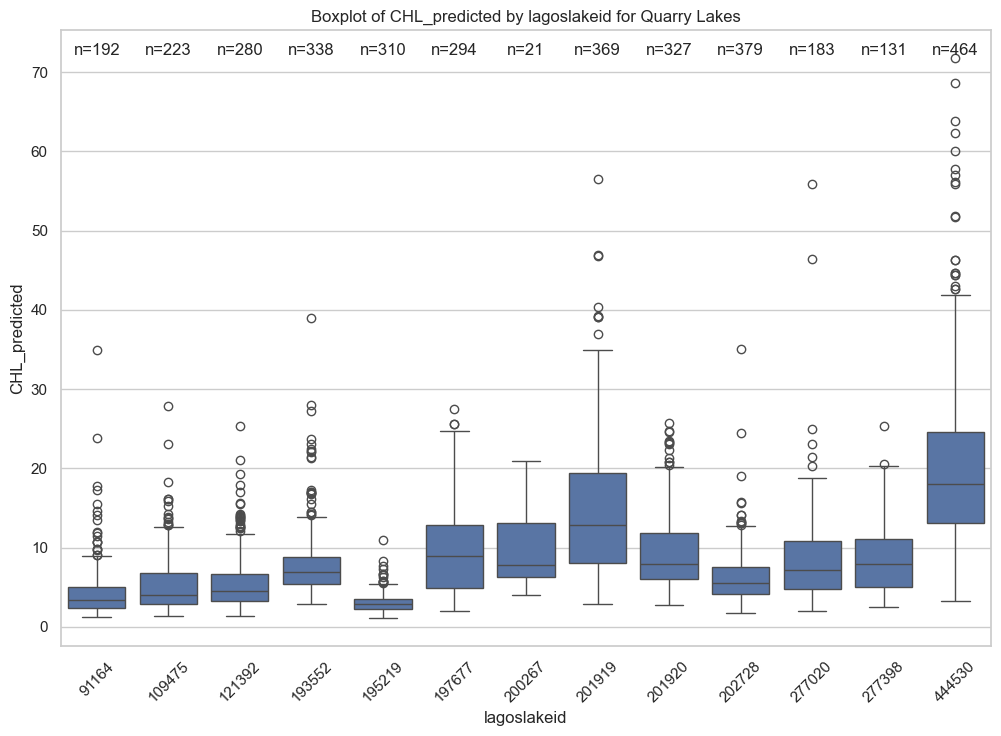

In [60]:
# Filter the DataFrame to include only quarry lakes
quarry_lakes_df = df_data[df_data['laketype'] == 'Quarry']
# Set the theme to look more like ggplot2
sns.set_theme(style="whitegrid")

# Create a boxplot for CHL_predicted with lagoslakeid as categories
plt.figure(figsize=(12, 8))
ax = sns.boxplot(x='lagoslakeid', y='CHL_predicted', data=quarry_lakes_df)
plt.title('Boxplot of CHL_predicted by lagoslakeid for Quarry Lakes')
plt.xlabel('lagoslakeid')
plt.ylabel('CHL_predicted')
plt.xticks(rotation=45)  # Rotate x-axis labels if needed

# Add the number of points on each plot
grouped = quarry_lakes_df.groupby('lagoslakeid').size()
for i, count in enumerate(grouped):
    ax.text(i, quarry_lakes_df['CHL_predicted'].max(), f'n={count}', ha='center', va='bottom')
plt.show()

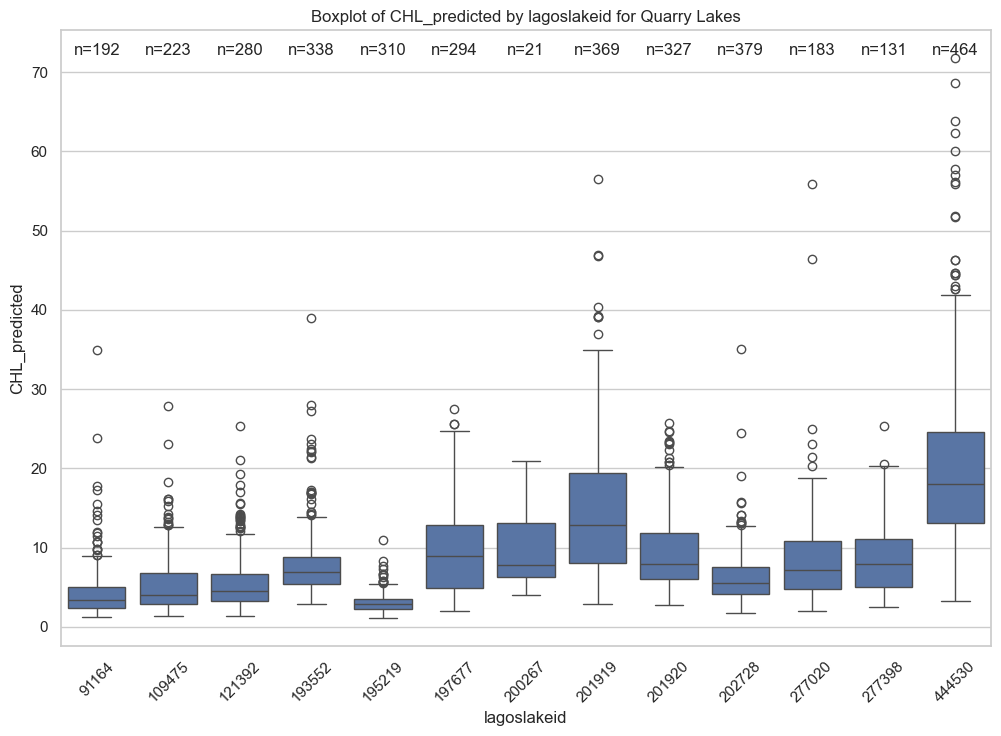

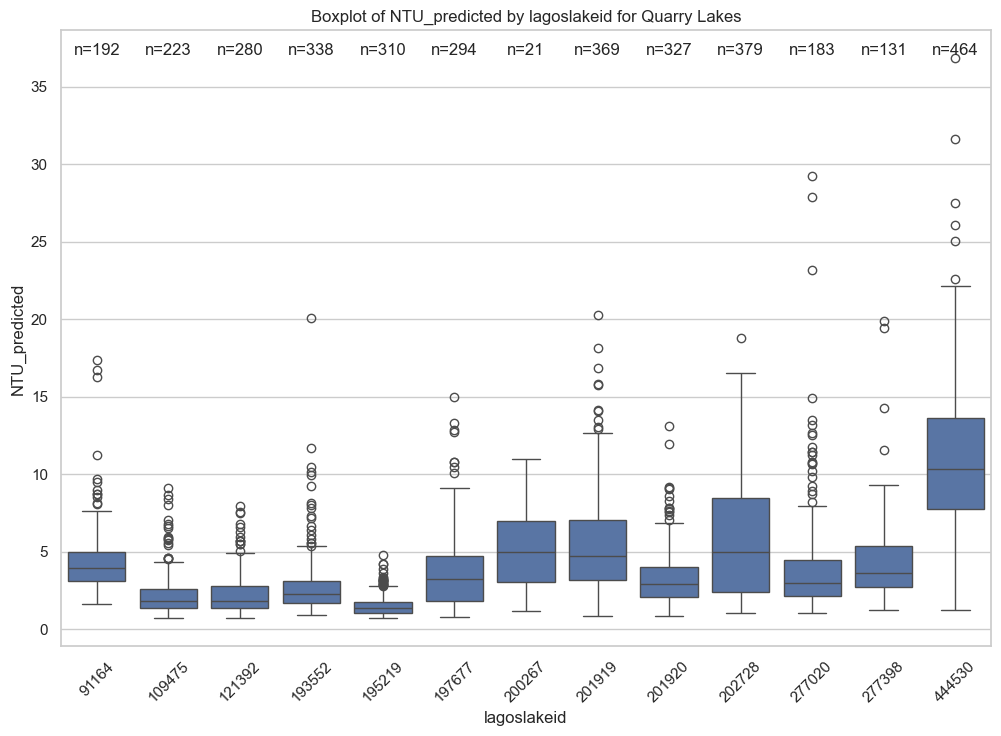

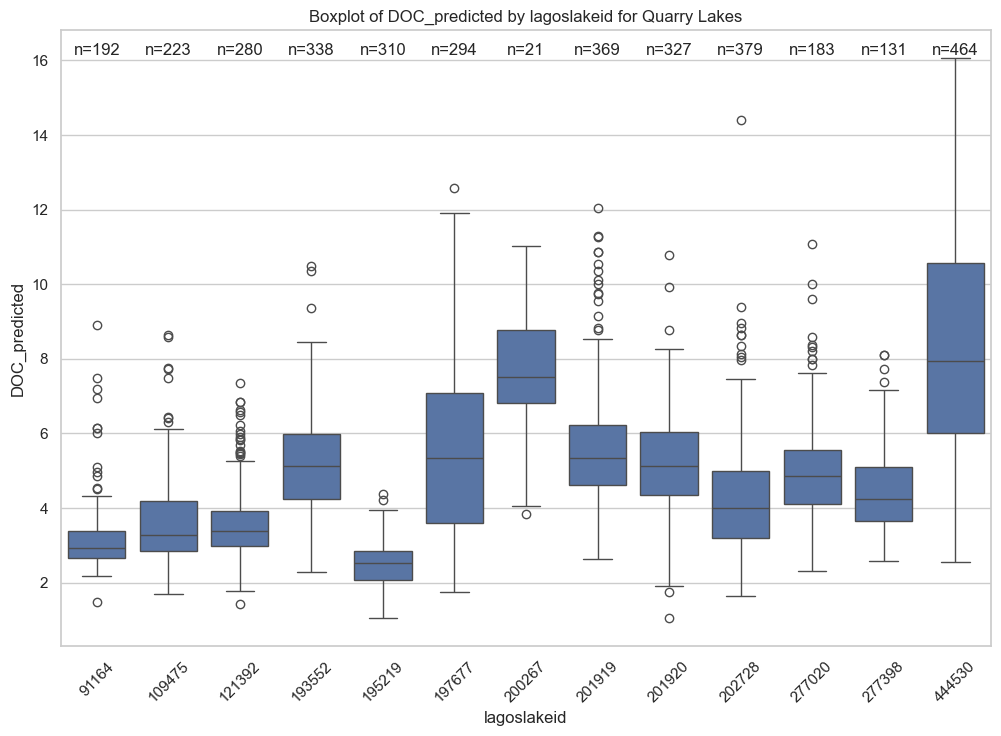

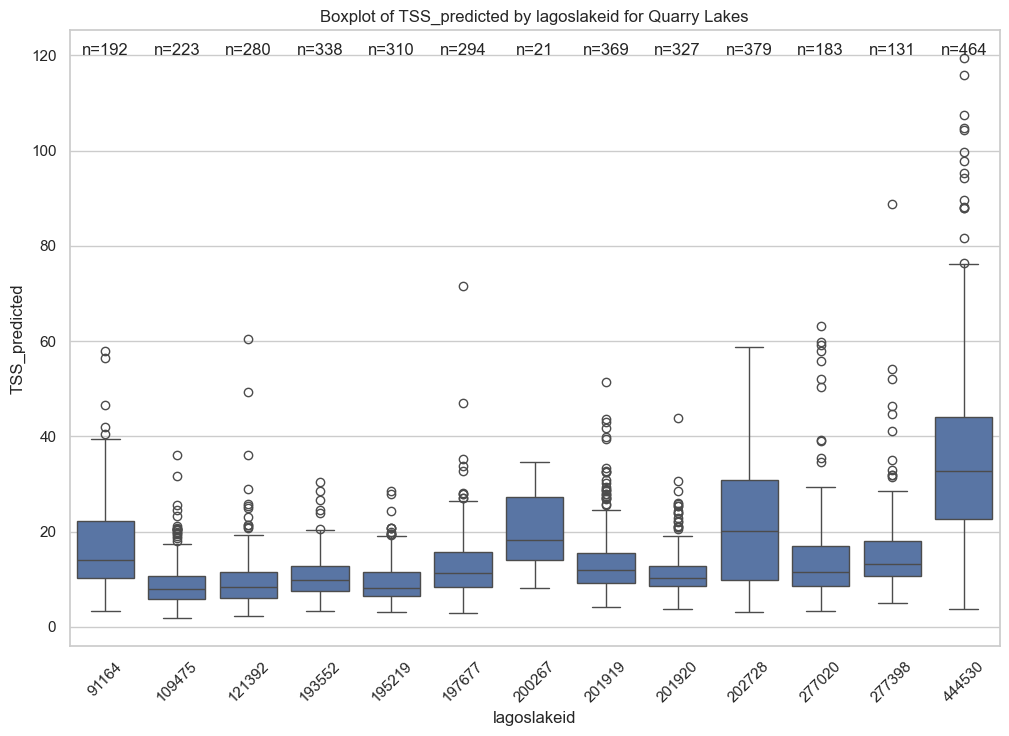

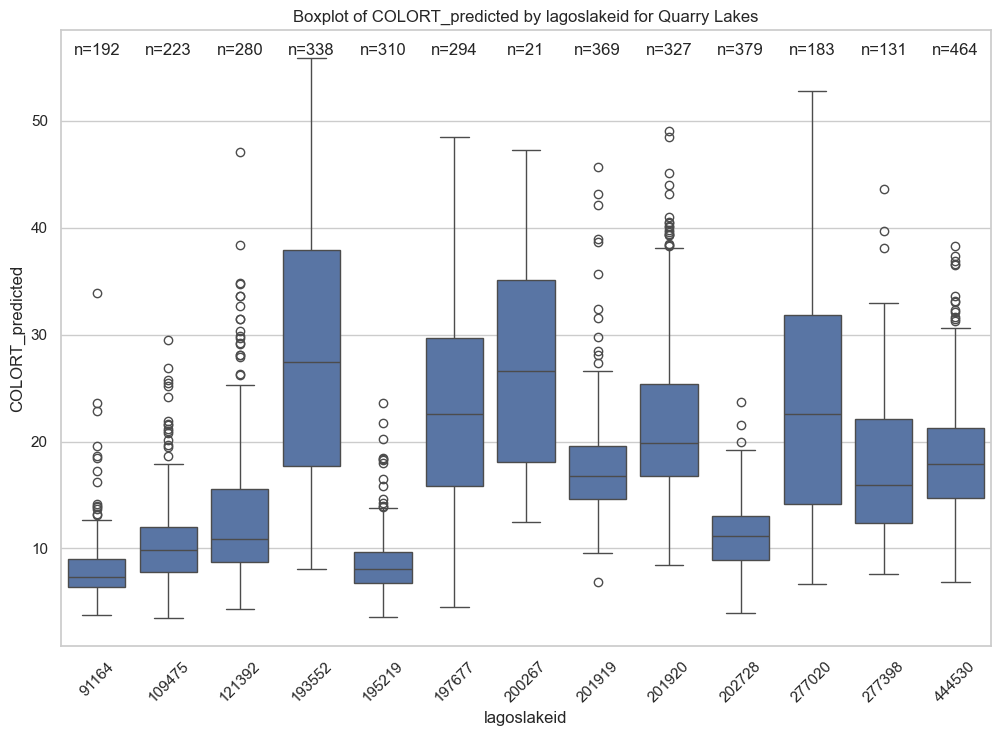

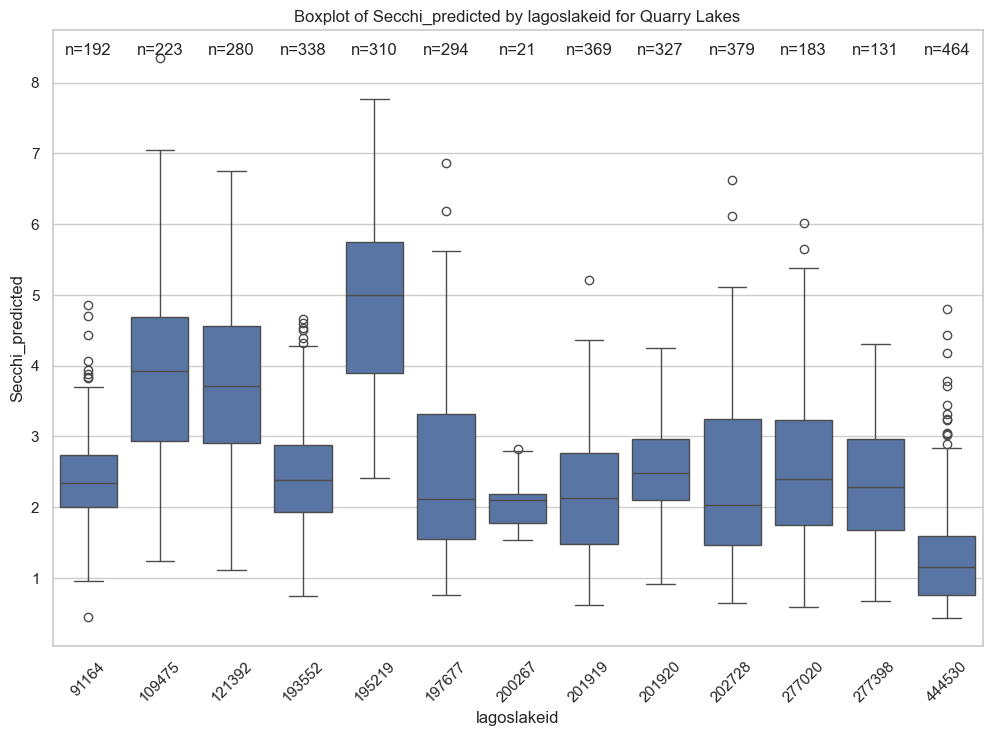

In [62]:
# Define the function to create a boxplot
def create_boxplot(df, variable):
    # Filter the DataFrame to include only quarry lakes
    quarry_lakes_df = df[df['laketype'] == 'Quarry']
    
    # Set the theme to look more like ggplot2
    sns.set_theme(style="whitegrid")
    
    # Create a boxplot for the specified variable with lagoslakeid as categories
    plt.figure(figsize=(12, 8))
    ax = sns.boxplot(x='lagoslakeid', y=variable, data=quarry_lakes_df)
    plt.title(f'Boxplot of {variable} by lagoslakeid for Quarry Lakes')
    plt.xlabel('lagoslakeid')
    plt.ylabel(variable)
    plt.xticks(rotation=45)  # Rotate x-axis labels if needed
    
    # Add the number of points on each plot
    grouped = quarry_lakes_df.groupby('lagoslakeid').size()
    for i, count in enumerate(grouped):
        ax.text(i, quarry_lakes_df[variable].max(), f'n={count}', ha='center', va='bottom')
    
    plt.show()

# Variables in dataset
vars = ['CHL_predicted', 'NTU_predicted', 'DOC_predicted', 'TSS_predicted', 'COLORT_predicted', 'Secchi_predicted']

# Loop through each variable and create a boxplot
for var in vars:
    create_boxplot(df_data, var)

- Example plotly for interactive visualization of Chl-a

In [65]:
import plotly.express as px
import pandas as pd

# Ensure 'SENSING_TIME' is in datetime format
df_data['SENSING_TIME'] = pd.to_datetime(df_data['SENSING_TIME'])

# Filter the DataFrame to include only quarry lakes
quarry_lakes_df = df_data[df_data['laketype'] == 'Quarry']

# Get unique lagoslakeid values
unique_lake_ids = quarry_lakes_df['lagoslakeid'].unique()

# Loop through each lagoslakeid and create a scatter plot
for lake_id in unique_lake_ids:
    lake_df = quarry_lakes_df[quarry_lakes_df['lagoslakeid'] == lake_id]
    fig = px.scatter(lake_df, x='SENSING_TIME', y='CHL_predicted', title=f'Scatter Plot of CHL_predicted for Lake ID {lake_id}',
                     labels={'SENSING_TIME': 'Sensing Time', 'CHL_predicted': 'CHL Predicted'})
    fig.show()


- Plot all at once

In [66]:
import plotly.express as px
import pandas as pd

# Ensure 'SENSING_TIME' is in datetime format
df_data['SENSING_TIME'] = pd.to_datetime(df_data['SENSING_TIME'])

# Filter the DataFrame to include only quarry lakes
quarry_lakes_df = df_data[df_data['laketype'] == 'Quarry']

# Create a scatter plot for CHL_predicted with lagoslakeid as color
fig = px.scatter(quarry_lakes_df, x='SENSING_TIME', y='CHL_predicted', color='lagoslakeid',
                 title='Scatter Plot of CHL_predicted for Each lagoslakeid in Quarry Lakes',
                 labels={'SENSING_TIME': 'Sensing Time', 'CHL_predicted': 'CHL Predicted', 'lagoslakeid': 'Lake ID'})
# Show the plot
fig.show()

In [67]:
import plotly.graph_objects as go
import pandas as pd

# Ensure 'SENSING_TIME' is in datetime format
df_data['SENSING_TIME'] = pd.to_datetime(df_data['SENSING_TIME'])

# Filter the DataFrame to include only quarry lakes
quarry_lakes_df = df_data[df_data['laketype'] == 'Quarry']

# Create a scatter plot for CHL_predicted with lagoslakeid as color
fig = go.Figure()

# Add a scatter trace for each lagoslakeid
unique_lake_ids = quarry_lakes_df['lagoslakeid'].unique()
for lake_id in unique_lake_ids:
    lake_df = quarry_lakes_df[quarry_lakes_df['lagoslakeid'] == lake_id]
    fig.add_trace(go.Scatter(x=lake_df['SENSING_TIME'], y=lake_df['CHL_predicted'],
                             mode='markers', name=f'Lake ID {lake_id}'))

# Update layout
fig.update_layout(title='Scatter Plot of CHL_predicted for Each lagoslakeid in Quarry Lakes',
                  xaxis_title='Sensing Time',
                  yaxis_title='CHL Predicted',
                  legend_title='Lake ID')

# Show the plot
fig.show()

In [76]:
df_data['lagoslakeid'].value_counts()

lagoslakeid
483387    1160
196849    1141
454077    1140
454567    1066
447823    1052
          ... 
461510      12
217272      11
462959      10
224597       8
470015       2
Name: count, Length: 10286, dtype: int64

In [77]:
df_data.head()

,SENSING_TIME,lagoslakeid,CHL_predicted,NTU_predicted,DOC_predicted,TSS_predicted,COLORT_predicted,Secchi_predicted,Negative_reflectance_min,Negative_reflectance_median,Pixel_perc_of_max,Duplicate_day,QAQC_recommend,laketype
0,2013-08-15 17:00:00,100,2.807634,0.963601,3.068492,8.920338,15.202987,5.122992,False,False,21.978022,False,True,Natural
1,2013-08-31 17:00:00,100,4.895704,1.640338,5.594772,4.579080,37.208688,2.605190,False,False,46.153846,False,True,Natural
2,2013-09-16 17:00:00,100,5.372379,1.404496,5.624606,4.210819,40.791857,2.846124,False,False,50.549451,False,True,Natural
3,2013-10-02 17:00:00,100,4.905962,1.459691,5.354506,4.445139,42.513444,2.434320,False,False,51.648352,False,True,Natural
4,2013-10-18 17:00:00,100,6.860724,1.177845,3.980639,17.088265,35.204730,2.226410,False,False,62.637363,False,True,Natural


In [83]:
df_data.to_csv(os.path.join(data_dir,'lagos-landsat_022825.csv'), index = False)